In [244]:
#Using matplotlib for image loading and ploting
#Using numpy library to manipulate images
from matplotlib import pyplot
import numpy as np
import math
import matplotlib.patches as patches
from PIL import Image

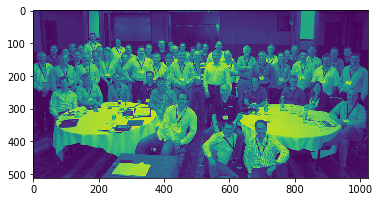

In [245]:
groupImage = pyplot.imread("groupGray.jpg")
baba_g = pyplot.imread("boothiGray.jpg")
pyplot.imshow(groupImage)

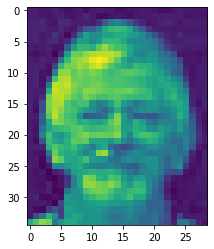

In [246]:
pyplot.imshow(baba_g)
#Getting height and width of both images for template matching
shape_baba_image = baba_g.shape
shape_group_image = groupImage.shape
height_baba_image = shape_baba_image[0]
width_baba_image = shape_baba_image[1]
height_group_image = shape_group_image[0]
width_group_image = shape_group_image[1]

In [247]:
Initial_population = 50
#Generating random numbers for 50 population
random_50_height_group_image = np.random.randint(0,height_group_image+1,Initial_population)
random_50_width_group_image = np.random.randint(0,width_group_image+1,Initial_population)

In [248]:
#Slicing 50 population of same shape as baba g shape
#Getting fitness of each sliced image with baba g
pop_50 = []
for i in range(Initial_population):
    #checking slice height is it out side group image 
    random_height = random_50_height_group_image[i]
    check_height = height_group_image - random_height
    if check_height>=height_baba_image:
        random_width = random_50_width_group_image[i]
        check_width = width_group_image - random_width
        if check_width>=width_baba_image:
            temp_slice = groupImage[random_50_height_group_image[i]:random_50_height_group_image[i]+height_baba_image,
                                   random_50_width_group_image[i]:random_50_width_group_image[i]+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[random_50_height_group_image[i]:random_50_height_group_image[i]+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
            
    else:
        height = height_group_image-height_baba_image
        random_width = random_50_width_group_image[i]
        check_width = width_group_image - random_width
        if check_width>=width_baba_image:
            temp_slice = groupImage[height:height+height_baba_image,
                                   random_50_width_group_image[i]:random_50_width_group_image[i]+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[height:height+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            pop_50.append([Fitness,random_50_height_group_image[i],random_50_width_group_image[i]])

In [249]:
sorted_pop_50 = sorted(pop_50,key=lambda x:x[0],reverse=True)

In [250]:
def Cross_over_mutation(x1,y1,x2,y2,height_group_image,width_group_image):
    total_bits_height = int(math.ceil(math.log2(height_group_image)))
    total_bits_width = int(math.ceil(math.log2(width_group_image)))
    x1_bin = bin(x1)
    x1_bin = x1_bin[2:]
    y1_bin = bin(y1)
    y1_bin = y1_bin[2:]
    x2_bin = bin(x2)
    x2_bin = x2_bin[2:]
    y2_bin = bin(y2)
    y2_bin = y2_bin[2:]
    check1 = total_bits_height - len(x1_bin)
    check2 = total_bits_width - len(y1_bin)
    check3 = total_bits_height - len(x2_bin)
    check4 = total_bits_width - len(y2_bin)
    if check1 > 0:
        for i in range(check1):
            x1_bin = '0' + x1_bin
        if check2 > 0:
            for j in range(check2):
                y1_bin = '0' + y1_bin
    if check3 > 0:
        for i in range(check3):
            x2_bin = '0' + x2_bin
        if check4 > 0:
            for j in range(check4):
                y2_bin = '0' + y2_bin
    len_x1_bin = len(x1_bin)
    len_y1_bin = len(y1_bin)
    len_x2_bin = len(x2_bin)
    len_y2_bin = len(y2_bin)
    x1_x2 = x1_bin + x2_bin
    y1_y2 = y1_bin + y2_bin
    x1_x2 = list(map(int,x1_x2))
    y1_y2 = list(map(int,y1_y2))
    #Cross over
    len_x1_x2 = len(x1_x2)
    len_y1_y2 = len(y1_y2)
    for i in range(len_y1_y2//2):
        random_index_x1_x2 = np.random.randint(0,len_x1_x2)
        random_index_y1_y2 = np.random.randint(0,len_y1_y2)
        #swaping
        temp = y1_y2[random_index_y1_y2]
        y1_y2[random_index_y1_y2] = x1_x2[random_index_x1_x2]
        x1_x2[random_index_x1_x2] = temp
    #mutation
    for i in range(len_x1_x2//len_x1_x2):
        random_index_x1_x2 = np.random.randint(0,len_x1_x2)
        random_index_y1_y2 = np.random.randint(0,len_y1_y2)
        check = x1_x2[random_index_x1_x2]
        if check == 0:
            x1_x2[random_index_x1_x2] = 1
            check2 = y1_y2[random_index_y1_y2]
            if check2 == 0:
                y1_y2[random_index_y1_y2] = 1
            else:
                y1_y2[random_index_y1_y2] = 0
        else:
            x1_x2[random_index_x1_x2] = 0
            check2 = y1_y2[random_index_y1_y2]
            if check2 == 0:
                y1_y2[random_index_y1_y2] = 1
            else:
                y1_y2[random_index_y1_y2] = 0
    x1_x2 = list(map(str,x1_x2))
    y1_y2 = list(map(str,y1_y2))
    x1_x2 = ''.join(map(str,x1_x2))
    x1 = x1_x2[:len_x1_bin]
    x2 = x1_x2[len_x1_bin:]
    y1_y2 = ''.join(map(str,y1_y2))
    y1 = y1_y2[:len_y1_bin]
    y2 = y1_y2[len_y1_bin:]
    x1 = "0b" + x1
    x1 = int(x1,2)
    x2 = "0b" + x2
    x2 = int(x2,2)
    y1 = "0b" + y1
    y1 = int(y1,2)
    y2 = "0b" + y2
    y2 = int(y2,2)
    return x1,y1,x2,y2
def fitness(x,y,height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g):
    check_height = height_group_image - x
    if check_height >= height_baba_image:
        check_width = width_group_image - y
        if check_width >= width_baba_image:
            temp_slice = groupImage[x:x+height_baba_image,y:y+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[x:x+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
            
    else:
        height = height_group_image-height_baba_image
        check_width = width_group_image - y
        if check_width >= width_baba_image:
            temp_slice = groupImage[height:height+height_baba_image,y:y+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness
        else:
            width = width_group_image-width_baba_image
            temp_slice = groupImage[height:height+height_baba_image,
                                    width:width+width_baba_image]
            Fitness = np.corrcoef(baba_g.flatten(),temp_slice.flatten())
            Fitness = float(Fitness[0][1])
            return Fitness

0.5140017981041093
Baba Ji is found in Generation 114
[0.9272316449006217, 104, 639]


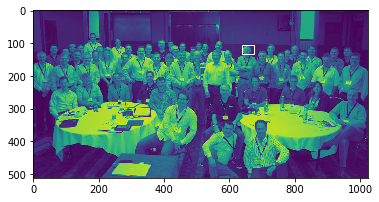

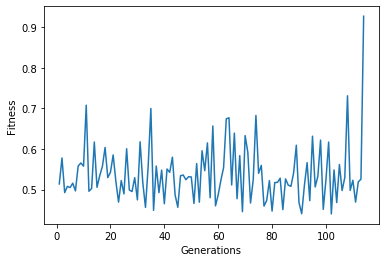

In [251]:
if sorted_pop_50[0][0] >= 0.90:
    print("Baba Ji is found in First Generation")
    print(sorted_pop_50[0])
    im = np.array(Image.open('groupGray.jpg'), dtype=np.uint8)
    fig,ax = pyplot.subplots(1)
    ax.imshow(im)
    rect = patches.Rectangle((sorted_pop_50[0][2],sorted_pop_50[0][1]),35,29,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    pyplot.show()
else:
    #Cross over and mutation for evolution towards best possibly match for baba g
    Best_match = sorted_pop_50[0][0]
    print(Best_match)
    a=1
    Fitness_of_Generations = []
    Generations = []
    while a<=5000:
        Fitness_of_Generations.append(sorted_pop_50[0][0])
        Generations.append(a)
        if sorted_pop_50[0][0] >= 0.9:
            print(f"Baba Ji is found in Generation {a}")
            print(sorted_pop_50[0])
            pyplot.imshow(groupImage)
            ax = pyplot.gca()
            rect = patches.Rectangle((sorted_pop_50[0][2],sorted_pop_50[0][1]),35,29,linewidth=1,edgecolor='w',facecolor='none')
            ax.add_patch(rect)
            pyplot.show()
            break
        Second_parent = 1
        for i in range(0,len(sorted_pop_50),2):
            x1 = sorted_pop_50[i][1]
            y1 = sorted_pop_50[i][2]
            x2 = sorted_pop_50[Second_parent][1]
            y2 = sorted_pop_50[Second_parent][2]
            New_Generation = Cross_over_mutation(x1,y1,x2,y2,height_group_image,width_group_image)
            for j in range(2):
                if j == 0:
                    Fitness = fitness(New_Generation[0],New_Generation[1],height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g)
                    sorted_pop_50[i][0] = Fitness
                    sorted_pop_50[i][1] = New_Generation[0]
                    sorted_pop_50[i][2] = New_Generation[1]
                else:
                    Fitness = fitness(New_Generation[2],New_Generation[3],height_baba_image,width_baba_image,height_group_image,width_group_image,groupImage,baba_g)
                    sorted_pop_50[Second_parent][0] = Fitness
                    sorted_pop_50[Second_parent][1] = New_Generation[2]
                    sorted_pop_50[Second_parent][2] = New_Generation[3]
            Second_parent = Second_parent + 2                                                                                                                                                                                         
        a = a + 1
        sorted_pop_50 = sorted(sorted_pop_50,key=lambda x:x[0],reverse=True)
pyplot.plot(Generations,Fitness_of_Generations)
pyplot.xlabel('Generations')
pyplot.ylabel('Fitness')
pyplot.show()

9
10
10100
11110
101000
110010
After adding 0 bit
000010100
0000011110
000101000
0000110010
After mutation cross over
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
0b101010100
0b000000000
0b1000111010
0b1000110010


(340, 570, 0, 562)


1000


10